In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from PIL import Image

mnist = fetch_openml('mnist_784', as_frame = False)




TypeError: Invalid shape (784,) for image data

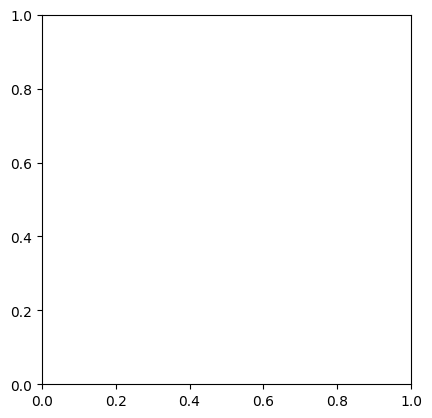

In [15]:
X = mnist.data
y = mnist.target


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
        ("std", StandardScaler()),
        ("log_reg", LogisticRegression(
            solver="lbfgs",
            max_iter = 5000,
        ))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



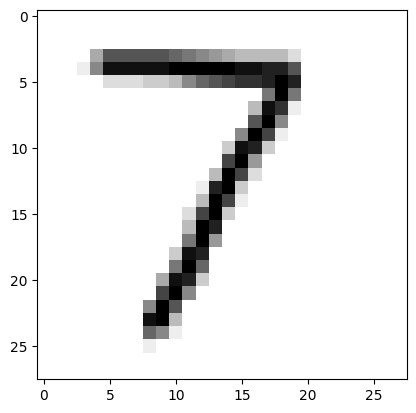

array(['5'], dtype=object)

In [12]:

def Photo(i):
    img = Image.open(f"img/{i}.png").convert("L")
    img_resized = img.resize((28, 28), Image.Resampling.LANCZOS)
    arr = np.array(img_resized)
    arr = 255 - arr
    arr = (arr / 16).astype(int)
    plt.imshow(arr, cmap=plt.cm.gray_r)
    plt.show()
    arr = arr.reshape(1,784)
    return arr

index = 151
ph_arr = Photo(index)
model.predict(ph_arr)